# Q1: Categorize Columns in DataFrame

### Q1: Categorize Columns in DataFrame

In this task, we categorize columns of a DataFrame into numeric and categorical types without using Pandas built-in functions. 
We will use the Iris dataset from scikit-learn and the Breast Cancer dataset from the same library.

### Step 1: Importing Required Libraries

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Loading Datasets

In [2]:
# Loading Iris dataset
iris_data = load_iris(as_frame=True)
iris_df = iris_data.frame

# Loading Breast Cancer dataset
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

### Step 3: Defining the Function to Categorize Columns

In [3]:
# Function to categorize columns into numeric and categorical
def categorize_columns(df):
    numeric_columns = []
    categorical_columns = []
    
    for column in df.columns:
        # Check if the column's datatype is numeric
        if all(isinstance(val, (int, float)) for val in df[column].dropna()):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)
    
    print("Numeric Columns:", numeric_columns)
    print("Categorical Columns:", categorical_columns)
    return numeric_columns, categorical_columns

### Step 4: Running the Function on Both Datasets

In [4]:
# Running the function on the Iris dataset
print("Iris Dataset:")
categorize_columns(iris_df)

# Running the function on the Breast Cancer dataset
print("\nBreast Cancer Dataset:")
categorize_columns(cancer_df)

Iris Dataset:
Numeric Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Categorical Columns: []

Breast Cancer Dataset:
Numeric Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
Categorical Columns: []


(['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'area error',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst radius',
  'worst texture',
  'worst perimeter',
  'worst area',
  'worst smoothness',
  'worst compactness',
  'worst concavity',
  'worst concave points',
  'worst symmetry',
  'worst fractal dimension',
  'target'],
 [])

# Q2: Concatenate, Clean and Analyze Data

### Step 1: Concatenate the two datasets and remove duplicates

In [5]:
def concatenate_and_clean_data(df1, df2):
    # Concatenate along the rows
    combined_df = pd.concat([df1, df2], ignore_index=True)
    # Remove any duplicate rows
    combined_df = combined_df.drop_duplicates()
    # Print the shape of the resulting DataFrame
    print(f"Combined DataFrame shape: {combined_df.shape}")
    return combined_df

# Run the function
combined_df = concatenate_and_clean_data(iris_df, cancer_df)

Combined DataFrame shape: (718, 35)


### Step 2: Calculate Correlation Matrix and Identify Highest Correlation

In [6]:
def analyze_correlations(df):
    # Convert DataFrame to a NumPy array for numeric analysis
    numeric_data = df.select_dtypes(include=[np.number]).values
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(numeric_data, rowvar=False)
    
    # Find the indices of the highest correlation pair (excluding the diagonal)
    np.fill_diagonal(correlation_matrix, 0)  # Ignore self-correlation
    max_corr_idx = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
    
    # Get column names of the highest correlated pair
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    col1, col2 = numeric_columns[max_corr_idx[0]], numeric_columns[max_corr_idx[1]]
    max_correlation = correlation_matrix[max_corr_idx]
    
    print(f"Highest correlation is between '{col1}' and '{col2}' with a coefficient of {max_correlation:.2f}")
    return col1, col2, max_correlation

# Run the function
analyze_correlations(combined_df)

Highest correlation is between 'sepal length (cm)' and 'sepal width (cm)' with a coefficient of nan


('sepal length (cm)', 'sepal width (cm)', nan)

# Q3: Create an array with random elements and calculate datamean

### Step 1: Create a NumPy array with 1000 random elements

In [7]:
np.random.seed(42)  # For reproducibility
numpy_array = np.random.rand(1000)

### Step 2: Compute the mean of every 5-element window

In [8]:
# Using a list comprehension to calculate the mean of each 5-sample window
datamean = np.array([np.mean(numpy_array[i:i+5]) for i in range(0, len(numpy_array), 5)])

### Step 3: Calculate minimum and maximum of datamean

In [9]:
data_min = np.min(datamean)
data_max = np.max(datamean)

### Step 4: Compute the maximum absolute value between data_min and data_max

In [10]:
value_max = max(abs(data_max), abs(data_min))

In [11]:
# Display the results
print(f"Minimum of datamean: {data_min:.4f}")
print(f"Maximum of datamean: {data_max:.4f}")
print(f"Maximum absolute value: {value_max:.4f}")

Minimum of datamean: 0.1450
Maximum of datamean: 0.8354
Maximum absolute value: 0.8354


# Q4: Database integration and manipulating the data 

### Before connecting to the MySQL, install mysql-connector

In [12]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


### 1. Establishing the MySQL Database Connection

In [13]:
import mysql.connector

# Establishing the connection to the MySQL database
conn = mysql.connector.connect(
    user='root',
    host='127.0.0.1',
    port='3306',
    password='zippo0506',
    database='CCT'
)

# Confirming the connection
print(conn)

### 2. Creating a Cursor Object

In [14]:
# Create a cursor object using the connection
mycursor = conn.cursor()

### 3. Creating the Database

In [15]:
# This command creates a new database if it does not exist
mycursor.execute("CREATE DATABASE IF NOT EXISTS CCT")

# Listing all available databases
mycursor.execute("SHOW DATABASES")
for db in mycursor:
    print(db)

('ahmed5',)
('cct',)
('information_schema',)
('mysql',)
('performance_schema',)
('robertdb',)
('sys',)


### 4. Creating a Table in the Database

In [16]:
# Creating the `student1` table with columns `name` and `address`
mycursor.execute("CREATE TABLE IF NOT EXISTS student1 (name VARCHAR(255), address VARCHAR(255))")

# Listing all tables to confirm the creation of `student1`
mycursor.execute("SHOW TABLES")
for table in mycursor:
    print(table)

('student1',)
('student3',)


### 5. Inserting Values into the Table

In [17]:
# Define records to insert into the `student1` table
values = [
    ("John Doe 1", "123 Main St Dublin"),
    ("John Doe 2", "123 Main St Cork"),
    ("John Doe 3", "123 Main St Kildare")
]

# Inserting multiple records into the table
for value in values:
    mycursor.execute("INSERT INTO student1 (name, address) VALUES (%s, %s)", value)

# Committing changes to save them in the database
conn.commit()

# Confirmation message
print("Records inserted successfully.")

Records inserted successfully.


### 6. Retrieving All Records from the Table

In [18]:
# Retrieve and display all records from `student1`
mycursor.execute("SELECT * FROM student1")
all_records = mycursor.fetchall()

print("All Records:")
for record in all_records:
    print(record)

All Records:
(1, 'John Doe 1', '123 Main St dublin')
(2, 'John Doe 2', '123 Main St cork')
(3, 'John Doe 3', '123 Main St kildare')
(4, 'Robert', '111 Dublin St')
(6, 'John Doe 1', '123 Main St Dublin')
(7, 'John Doe 2', '123 Main St Cork')
(8, 'John Doe 3', '123 Main St Kildare')
(9, 'John Doe 1', '123 Main St Dublin')
(10, 'John Doe 2', '123 Main St Cork')
(11, 'John Doe 3', '123 Main St Kildare')
(12, 'John Doe 1', '123 Main St Dublin')
(13, 'John Doe 2', '123 Main St Cork')
(14, 'John Doe 3', '123 Main St Kildare')
(15, 'John Doe 1', '123 Main St Dublin')
(16, 'John Doe 2', '123 Main St Cork')
(17, 'John Doe 3', '123 Main St Kildare')
(18, 'John Doe 1', '123 Main St Dublin')
(19, 'John Doe 2', '123 Main St Cork')
(20, 'John Doe 3', '123 Main St Kildare')
(21, 'John Doe 1', '123 Main St Dublin')
(22, 'John Doe 2', '123 Main St Cork')
(23, 'John Doe 3', '123 Main St Kildare')


### 7. Retrieving Records with a Condition

In [19]:
# Define a specific value to search for
search_value = "John Doe 1"

# Use the `WHERE` clause to fetch records that match the condition
mycursor.execute("SELECT * FROM student1 WHERE name = %s", (search_value,))
conditional_records = mycursor.fetchall()

print(f"Records with name '{search_value}':")
for record in conditional_records:
    print(record)

Records with name 'John Doe 1':
(1, 'John Doe 1', '123 Main St dublin')
(6, 'John Doe 1', '123 Main St Dublin')
(9, 'John Doe 1', '123 Main St Dublin')
(12, 'John Doe 1', '123 Main St Dublin')
(15, 'John Doe 1', '123 Main St Dublin')
(18, 'John Doe 1', '123 Main St Dublin')
(21, 'John Doe 1', '123 Main St Dublin')


### 8. Closing the Cursor and Connection

In [20]:
# Close cursor and database connection to free resources
mycursor.close()
conn.close()

# Q5: Exploratory Data Analysis (EDA) on the Iris Dataset

In this analysis, we will conduct an exploratory data analysis (EDA) on the Iris dataset from scikit-learn. The goal is to understand the data structure, summarize statistics, and create visualizations to reveal feature distributions and relationships among species. The insights from this analysis will aid in the initial stages of any machine learning process.

In [21]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

# Convert target to species names for readability
df['species'] = df['species'].apply(lambda x: iris_data.target_names[x])

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 1: Understanding Data Structure
We start by examining the shape, data types, and presence of any missing values in the dataset.

In [22]:
# Check dataset structure
data_shape = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()

data_shape, data_types, missing_values

((150, 5),
 sepal length (cm)    float64
 sepal width (cm)     float64
 petal length (cm)    float64
 petal width (cm)     float64
 species               object
 dtype: object,
 sepal length (cm)    0
 sepal width (cm)     0
 petal length (cm)    0
 petal width (cm)     0
 species              0
 dtype: int64)

## Step 2: Descriptive Statistics

Next, we calculate the descriptive statistics for each numerical feature to understand their distributions, central tendencies, and spread.

In [23]:
# Summary statistics of the dataset
stat_summary = df.describe()
stat_summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 3: Data Visualization
To further understand the data, we will generate several visualizations:

1. **Histograms** - Show the distribution of each feature.
2. **Boxplots** - Highlight the distribution, spread, and potential outliers within each feature.
3. **Correlation Matrix** - Displays the relationships between the numeric features.

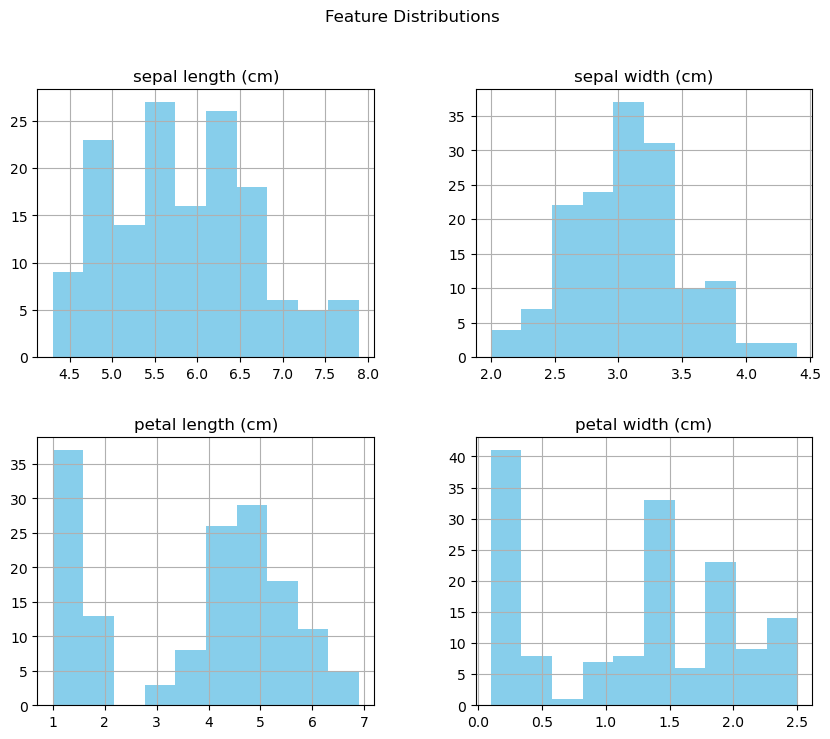

In [24]:
# Histograms for each feature
df.hist(bins=10, figsize=(10, 8), color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

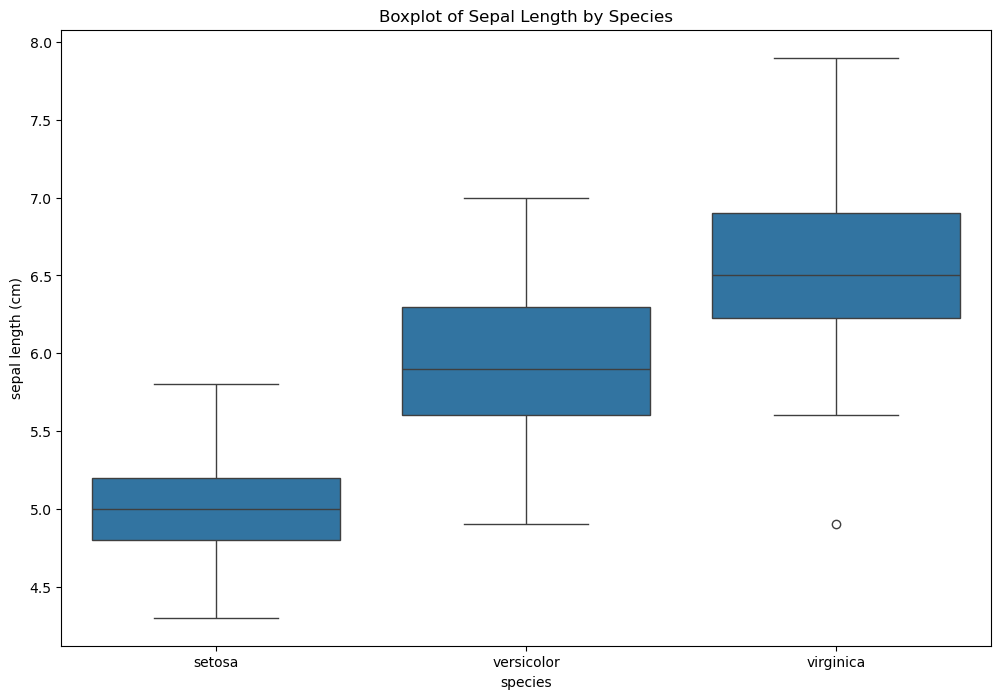

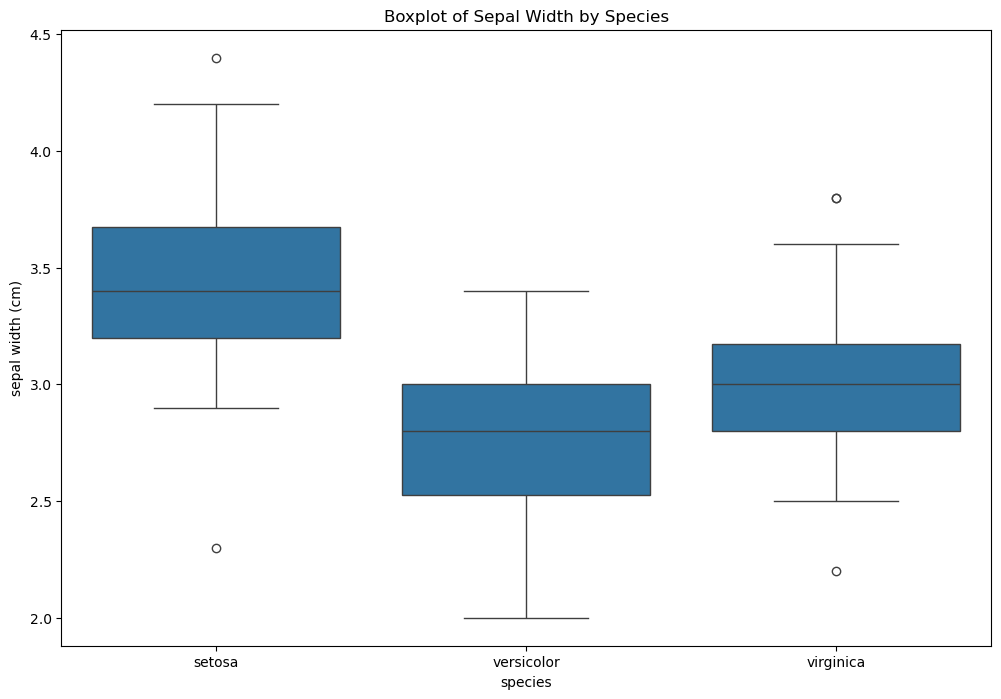

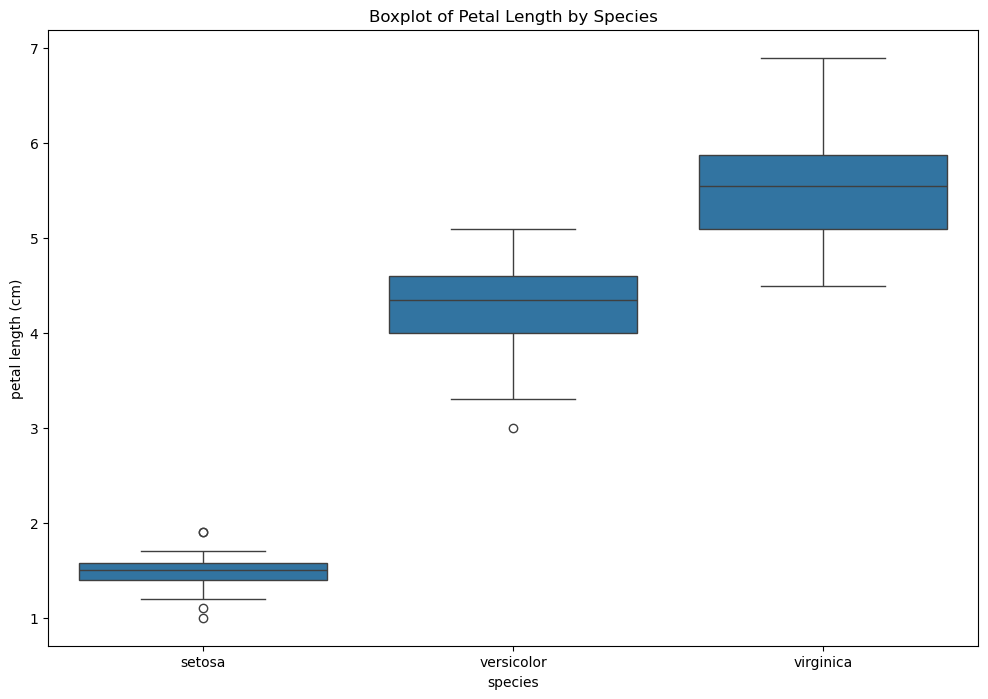

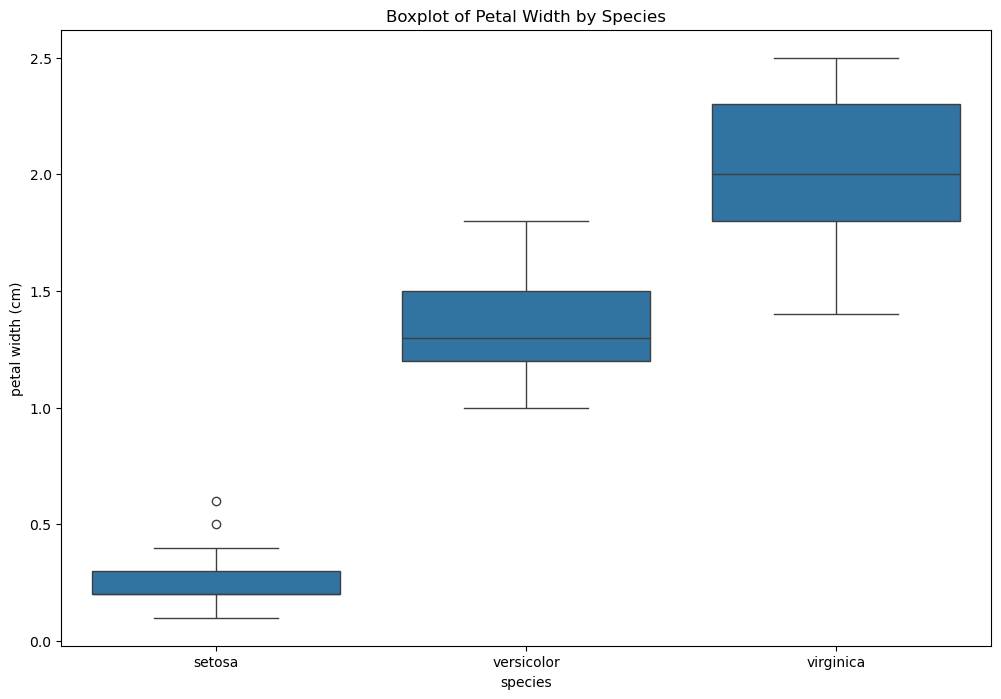

In [25]:
# Boxplots for each feature grouped by species
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='sepal width (cm)')
plt.title('Boxplot of Sepal Width by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title('Boxplot of Petal Length by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='petal width (cm)')
plt.title('Boxplot of Petal Width by Species')
plt.show()

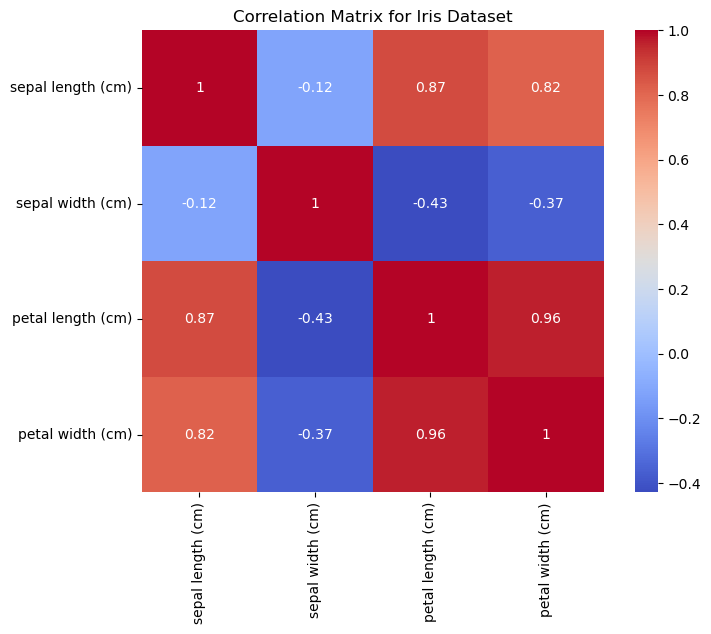

In [26]:
# Correlation Matrix and Heatmap
corr_matrix = df.iloc[:, :-1].corr()  # Exclude the species column for numeric correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

## Conclusions

- The EDA reveals distinct distributions of petal and sepal dimensions across different species in the Iris dataset.
- Histograms demonstrate that petal length and width features are particularly effective in distinguishing species, as shown by their separated distributions.
- The correlation matrix indicates strong positive correlations, especially between petal length and petal width. This insight may guide feature selection and engineering in later modeling stages.
  
EDA is a vital step in understanding data before applying machine learning models. By revealing patterns, relationships, and potential outliers, it helps improve model performance and ensures more informed decisions in AI applications.